In [15]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
pip install --upgrade scikit-learn mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LogisticRegression()

sel = EFS(lr, max_features=4, scoring='accuracy', cv=5)

In [5]:
model = sel.fit(df.iloc[:,:4],df['species'])

d:\CODES\Machine-Learning-From-Scratch\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Features: 15/15

In [6]:
model.best_score_

np.float64(0.9733333333333334)

In [7]:
model.best_feature_names_

('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [8]:
# detailed output
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': np.float64(0.7533333333333333),
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.56666667, 0.63333333]),
  'avg_score': np.float64(0.5666666666666667),
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.9533333333333334),
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.96),
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667]),
  'avg_score': np.float64(0.8133333333333332),
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': 

In [9]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal_width,)",0.046932,0.036515,0.018257
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal_length, sepal_width)",0.069612,0.05416,0.02708
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


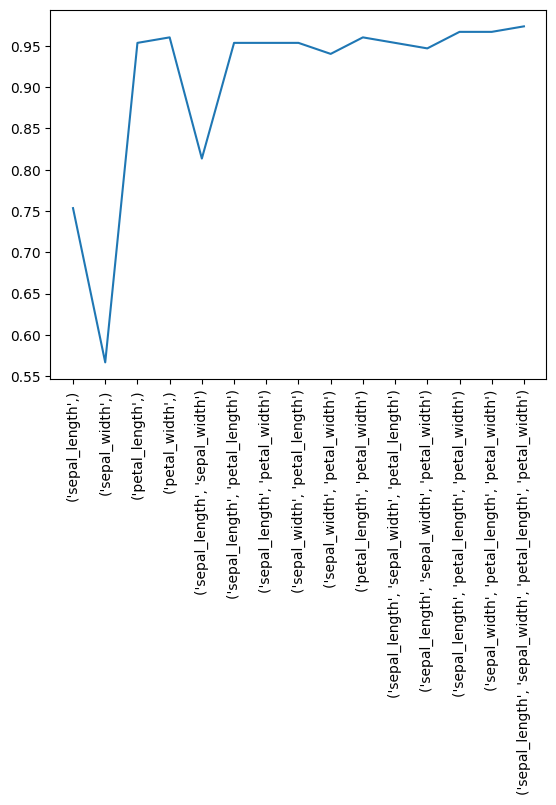

In [10]:
import matplotlib.pyplot as plt

plt.plot([str(k) for k in metric_df['feature_names']],metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

### Regression Example

In [11]:
df_2 = pd.read_csv('../Datasets/HousingData.csv')
df_2.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6,391,19.2,396.90,13.59,24.5
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10,22.0
230,0.53700,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8,307,17.4,378.35,11.65,24.3
164,2.24236,0.0,19.58,0.0,0.605,5.854,91.8,2.4220,5,403,14.7,395.11,11.64,22.7
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66,19.5
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
322,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4
446,6.28807,0.0,18.10,0.0,0.740,6.341,96.4,2.0720,24,666,20.2,318.01,17.79,14.9
409,NaN,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24,666,20.2,179.36,19.78,27.5
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_2.iloc[:,:-1],df_2['MEDV'],test_size=0.2,random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)

(404, 13)
(102, 13)


In [16]:
# check null values in the dataset

print(np.isnan(x_train).sum())
print(np.isnan(x_test).sum())
print(np.isnan(y_test).sum())
print(np.isnan(y_train).sum())

CRIM       18
ZN         17
INDUS      18
CHAS       16
NOX         0
RM          0
AGE        16
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      15
dtype: int64
CRIM       2
ZN         3
INDUS      2
CHAS       4
NOX        0
RM         0
AGE        4
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      5
dtype: int64
0
0


In [ ]:
# remove null values from x_train and x_test

x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)
# this will replace all the null values with 0 and inf values with large finite numbers. This is a common technique to handle missing values in the dataset. 

In [18]:
# feature scaling to improve the performance of the model

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
# Baseline model

import numpy as np
from sklearn.metrics import r2_score

model = LinearRegression()

model.fit(x_train,y_train)

print("Training : " ,np.mean(cross_val_score(model,x_train,y_train,cv=5, scoring='r2')))
print("Testing : " , np.mean(cross_val_score(model,x_test,y_test,cv=5, scoring='r2')))

Training :  0.7003001047707487
Testing :  0.5506010599429856


This shows that their is overfitting because the training score is very high than the testing score. 

In [20]:
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

sel = exh.fit(x_train, y_train)

Features: 8191/8191

In [21]:
sel.best_score_

np.float64(0.6846933959711148)

In [22]:
sel.best_feature_names_

('0', '1', '3', '4', '5', '7', '8', '9', '10', '11', '12')

In [23]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.0986126024699201, 0.22108727249304394, 0.14...",0.110615,"(0,)",0.066747,0.089869,0.029956
1,"(1,)","[-0.05413565041379198, 0.06369244433821997, 0....",0.077557,"(1,)",0.037895,0.051023,0.017008
2,"(2,)","[0.23208475205636958, 0.23223390285376477, 0.1...",0.153316,"(2,)",0.049704,0.066922,0.022307
3,"(3,)","[-0.0706352930089229, -0.12873637816424144, 0....",0.003292,"(3,)",0.064765,0.0872,0.029067
4,"(4,)","[0.18831320204786572, 0.15611671149828166, 0.1...",0.15303,"(4,)",0.053874,0.072536,0.024179
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8102820458025821, 0.7252601035491278, 0.757...",0.680431,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.111672,0.150357,0.050119
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7891541077629584, 0.7244770695696501, 0.776...",0.684076,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.116356,0.156664,0.052221
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7860318426347925, 0.7381332069590247, 0.774...",0.681947,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.116039,0.156236,0.052079
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7864560393075994, 0.7043992368255726, 0.767...",0.674558,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.114772,0.154531,0.05151


In [24]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1) 
    return 1 - (1 - r2) * coef

In [25]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

In [26]:
metric_df.sort_values('adjusted_r2',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
8029,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8124457202995304, 0.7409335402380597, 0.766...",0.684313,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.123517,0.166305,0.055435,404,10,0.67628
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8130655598671082, 0.7244324529963122, 0.768...",0.684693,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.121642,0.16378,0.054593,404,11,0.675846
7566,"(0, 3, 4, 5, 7, 8, 10, 11, 12)","[0.7945101439444053, 0.7353697835504784, 0.775...",0.68265,"(0, 3, 4, 5, 7, 8, 10, 11, 12)",0.127753,0.172009,0.057336,404,9,0.675401
7590,"(0, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8267144235800632, 0.7432764318441265, 0.747...",0.682167,"(0, 4, 5, 7, 8, 9, 10, 11, 12)",0.119181,0.160467,0.053489,404,9,0.674907
8164,"(0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7836152951223859, 0.7401684767442904, 0.775...",0.68364,"(0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.117447,0.158132,0.052711,404,11,0.674763
...,...,...,...,...,...,...,...,...,...,...
30,"(1, 7)","[-0.051415419342806024, 0.0722895535748006, 0....",0.075723,"(1, 7)",0.037001,0.049818,0.016606,404,2,0.071113
70,"(6, 7)","[-0.20293878987914726, 0.0949494982468142, 0.1...",0.073561,"(6, 7)",0.097165,0.130824,0.043608,404,2,0.06894
49,"(3, 7)","[-0.05449132594167394, -0.054532724631032314, ...",0.065445,"(3, 7)",0.072889,0.098139,0.032713,404,2,0.060784
7,"(7,)","[-0.020714728360076817, 0.06907241897075367, 0...",0.036859,"(7,)",0.036497,0.04914,0.01638,404,1,0.034463


In [27]:
X_train_sel = sel.transform(x_train)
X_test_sel = sel.transform(x_test)

In [28]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7035283686245846
testing 0.5721958274510113


### Sequential Backward Elimination

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# load the dataset
data = pd.read_csv('../Datasets/HousingData.csv')

# separate the target variable
x = data.drop("MEDV", axis=1)
y = data['MEDV']

# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(x_train.shape)

(404, 13)


In [45]:
# check null values in the dataset

print(np.isnan(x_train).sum())
print(np.isnan(x_test).sum())
print(np.isnan(y_test).sum())
print(np.isnan(y_train).sum())

# remove null values from x_train and x_test

x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)
# this will replace all the null values with 0 and inf values with large finite numbers. This is a common technique to handle missing values in the dataset. 

CRIM       17
ZN         15
INDUS      14
CHAS       15
NOX         0
RM          0
AGE        19
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      14
dtype: int64
CRIM       3
ZN         5
INDUS      6
CHAS       5
NOX        0
RM         0
AGE        1
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      6
dtype: int64
0
0


In [46]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [48]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test, y_test, cv=5, scoring='r2')))

training 0.6777973701640716
testing 0.657593899767025


In [ ]:

lr = LinearRegression()

# perform backward elimination
sfs = SFS(lr, k_features='best', forward=False, floating=False, scoring='r2',cv=5)       
# forward=True means we are performing forward selection, k_features='best' means we want to select the 
# best features based on the scoring metric, floating=False means we are not allowing the algorithm to 
# remove features once they have been added, cv=5 means we are using 5-fold cross validation to evaluate 
# the model performance.

sfs.fit(x_train, y_train)

d:\CODES\Machine-Learning-From-Scratch\.venv\Lib\site-packages\sklearn\externals\_numpydoc\docscrape.py:203: UserWarning: potentially wrong underline length... 
Examples 
----------- in 
Sequential Feature Selection for Classification and Regression.
...
  while not self._is_at_section() and not self._doc.eof():


,estimator,LinearRegression()
,k_features,"(1, ...)"
,forward,True
,floating,False
,verbose,0
,scoring,'r2'
,cv,5
,n_jobs,1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


In [51]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [52]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
1,"(12,)","[0.5073293182432412, 0.420938373678174, 0.2904...",0.458554,"(12,)",0.121509,0.094538,0.047269,404,1,0.457207
2,"(5, 12)","[0.6133715579717592, 0.5492425177398221, 0.453...",0.57207,"(5, 12)",0.084276,0.065569,0.032785,404,2,0.569936
3,"(5, 10, 12)","[0.7094209840957906, 0.6099511801279192, 0.534...",0.630291,"(5, 10, 12)",0.0747,0.058119,0.02906,404,3,0.627518
4,"(5, 10, 11, 12)","[0.7121452698103111, 0.617699186494587, 0.5632...",0.63782,"(5, 10, 11, 12)",0.062372,0.048528,0.024264,404,4,0.634189
5,"(0, 5, 10, 11, 12)","[0.728225840793565, 0.6168466230089187, 0.5823...",0.64234,"(0, 5, 10, 11, 12)",0.062722,0.0488,0.0244,404,5,0.637847
6,"(0, 1, 5, 10, 11, 12)","[0.726604126970507, 0.617421634402468, 0.58139...",0.641843,"(0, 1, 5, 10, 11, 12)",0.062228,0.048416,0.024208,404,6,0.63643
7,"(0, 1, 5, 7, 10, 11, 12)","[0.7498898611405316, 0.6373123080059453, 0.524...",0.646703,"(0, 1, 5, 7, 10, 11, 12)",0.092824,0.07222,0.03611,404,7,0.640458
8,"(0, 1, 4, 5, 7, 10, 11, 12)","[0.7543988507608989, 0.6672647633144022, 0.589...",0.667055,"(0, 1, 4, 5, 7, 10, 11, 12)",0.070181,0.054603,0.027301,404,8,0.660311
9,"(0, 1, 4, 5, 7, 8, 10, 11, 12)","[0.7589105498217887, 0.6665982427438657, 0.601...",0.673797,"(0, 1, 4, 5, 7, 8, 10, 11, 12)",0.067398,0.052438,0.026219,404,9,0.666346
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7578150539301357, 0.6700578284214946, 0.621...",0.680155,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.06026,0.046885,0.023442,404,10,0.672016


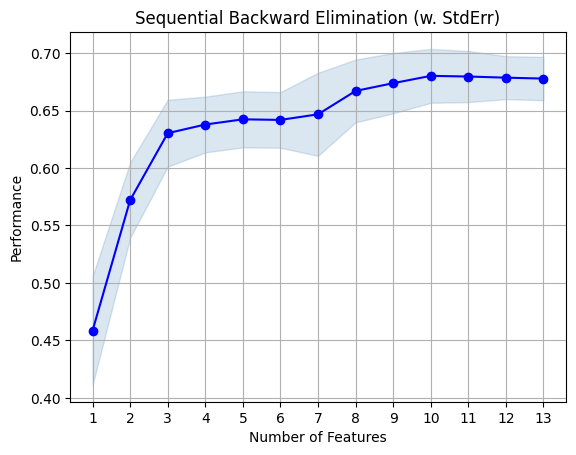

In [53]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [56]:
X_train_sel = sfs.transform(x_train)
X_test_sel = sfs.transform(x_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.6801547655582941
testing 0.6938816039558848


In [57]:
X_train_sel.shape

(404, 10)

### Using Sklearn

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS


sfs2 = SFS(model,
           n_features_to_select=5,
           direction='forward',
           scoring='r2',
           n_jobs=-1,
           cv=5,
           tol=0.01)

sfs2 = sfs2.fit(x_train, y_train)

**tol** is the minimum improvement to be made in order for a feature to be added. This is used to avoid adding features that do not contribute much to the model.

example: if the current score is 0.8 and the new score is 0.81, then the improvement is 0.01. If `tol` is set to 0.01, then the new feature will be added because the improvement is equal to `tol`. If `tol` is set to 0.02, then the new feature will not be added because the improvement is less than `tol`.

In [ ]:
np.arange(X.shape[1])[sfs2.support_]